# ML Project - Pima Indians Diabetes Dataset (woman)

**By Elen Davtyan**

## Փուլ 1․ Տվյալների ուսումնասիրություն և բաժանում

**1. Տվյալների բազայի ընտրություն:** \
Ընտրվել է Pima indians dibetes dataset-ը։ \
**2․ Հետազոտել տվյալները:** \
Տրված են հատուկ հատկանիշներ և պիտակներ ըստ որի պետք է վարժեցնել մոդելը, որպեսզի այն կարողանա ճիշտ կանխագուշակել արդյոք մարդը ունի շաքարախտ թե ոչ։ Հատկանիշներն են՝ `հղիությունների քանակը`, `գլյուկոզայի քանակը`, `BMI(Body mass index)`, `գենետիկական/ժառանգական հատվածը`, `տարիքը`, `արյան ճնշումը`, `մաշկի հաստությունը`։ Տողերի քանակ 769, Սյուների քանակ 9(ներառյալ պիտակների սյունը)։ Գլյուկոզան ներկայացված է ԱՄՆ-ի համակարգով(միլիգրամներով, ի տարբերություն եվրոպականի՝ մոլերով)։

## Փուլ 2․  Հատկանիշների նախնական մշակում (Feature Preprocessing) և ճարտարագիտություն (Feature Engineering)

In [1]:
# Ներբեռնենք օգտագործվող գրադարանները - Downloading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# starting to work with data
x = np.loadtxt("C:\\Users\\USER\\Desktop\\diabetes.csv", delimiter=',', dtype=str)

column_names = x[0].copy()
train_data = x[1:].copy()
column_names, train_data, train_data.shape

(array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='<U24'),
 array([['6', '148', '72', ..., '0.627', '50', '1'],
        ['1', '85', '66', ..., '0.351', '31', '0'],
        ['8', '183', '64', ..., '0.672', '32', '1'],
        ...,
        ['5', '121', '72', ..., '0.245', '30', '0'],
        ['1', '126', '60', ..., '0.349', '47', '1'],
        ['1', '93', '70', ..., '0.315', '23', '0']], dtype='<U24'),
 (768, 9))

### Pandas-ով կատարվել է տվյալների համակարգի նախնական ուսումնասիրությունը և վիզուալիզացիան

In [3]:
x_df = pd.read_csv("C:\\Users\\USER\\Desktop\\diabetes.csv")
x_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# ստուգենք արդյո՞ք մեր տվյալներում բացակայող արժեքներ կան
x_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

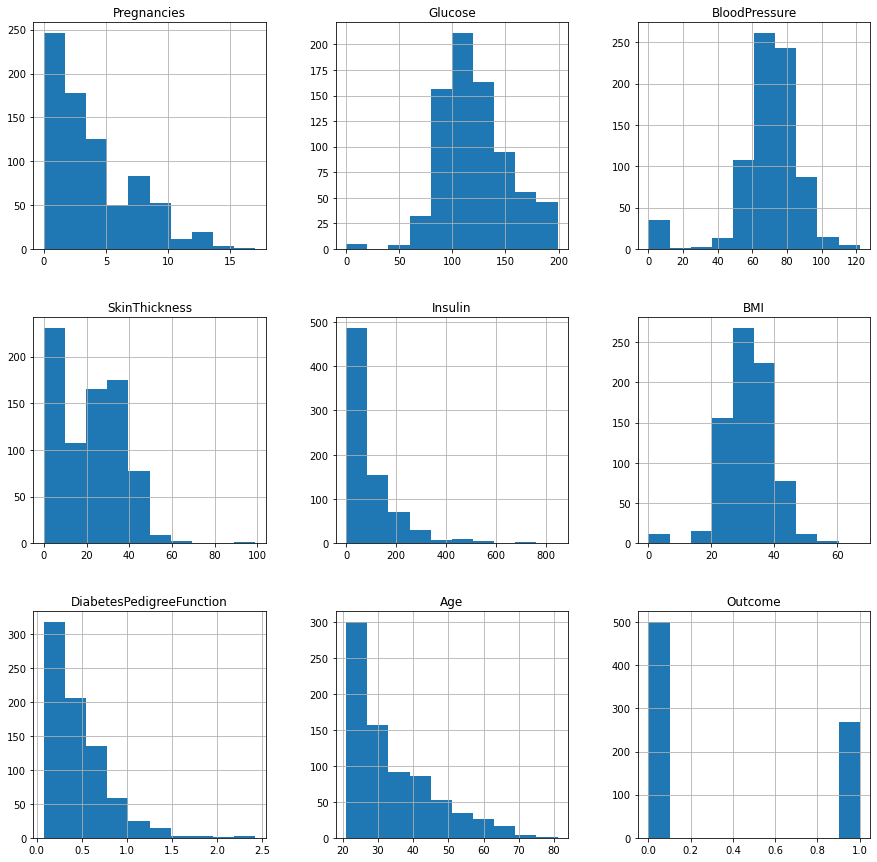

In [6]:
# հիստոգրամի միջոցով տեսնենք, թե ինչ տեսք ունեն մեր տվյալները զրոներով
p = x_df.hist(figsize=(15, 15))

In [7]:
# զրոները փոխարինենեք NaN-ով և հաշվենք դրանց քանակը՝ պահպանելով copy version-ում
x_df_copy = x_df.copy(deep = True)
x_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = x_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.NaN)

print(x_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
# Aiming to impute NAN values for the columns in accordance with their distribution 
x_df_copy['Glucose'].fillna(x_df_copy['Glucose'].mean(), inplace=True)
x_df_copy['BloodPressure'].fillna(x_df_copy['BloodPressure'].mean(), inplace=True)
x_df_copy['SkinThickness'].fillna(x_df_copy['SkinThickness'].median(), inplace=True)
x_df_copy['Insulin'].fillna(x_df_copy['Insulin'].median(), inplace=True)
x_df_copy['BMI'].fillna(x_df_copy['BMI'].median(), inplace=True)

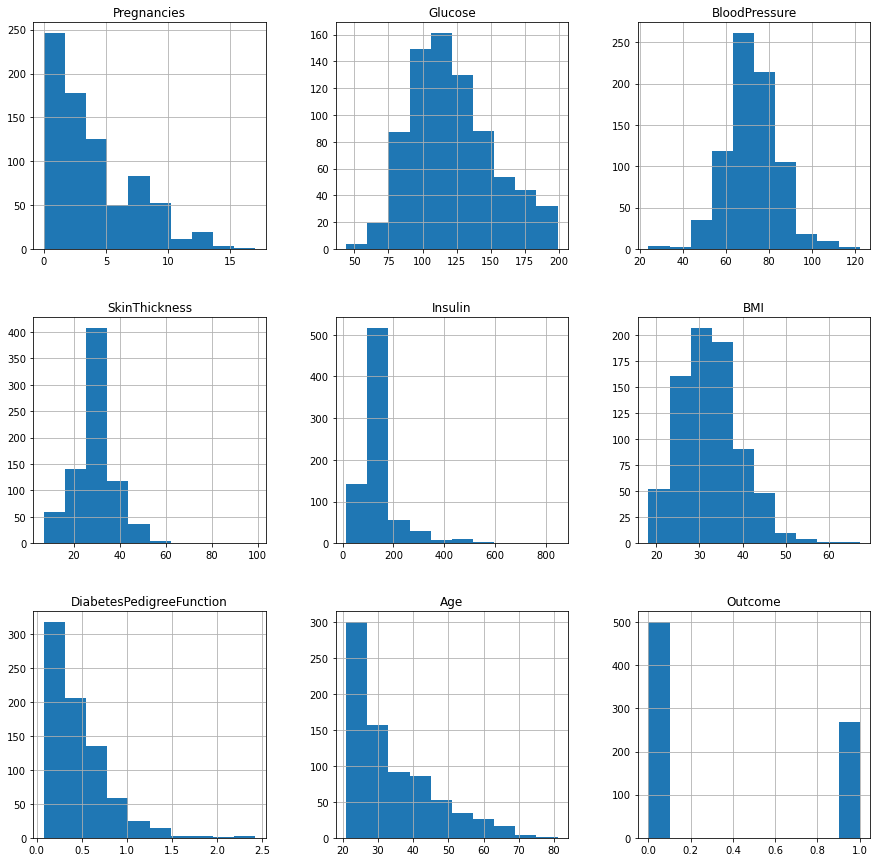

In [39]:
p = x_df_copy.hist(figsize=(15,15))

### Վերադառնանք numpy-ով աշխատանքին

In [10]:
# seperating labels
label_col = np.where(column_names == 'Outcome')[0][0]
labels = train_data[:, label_col].astype(int)
np.unique(labels, return_counts=True)

(array([0, 1]), array([500, 268], dtype=int64))

In [11]:
# deleting useless features
features_to_delete = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'Outcome']
keep_mask = []
for feature in column_names:
    if feature in features_to_delete:
        keep_mask.append(False)
    else:
        keep_mask.append(True)
keep_mask
train_data.shape

(768, 9)

In [12]:
# keeping the features that will be needed 
train_data = train_data[:, keep_mask]
column_names = column_names[keep_mask]
train_data[:20], column_names

(array([['148', '33.6', '0.627', '50'],
        ['85', '26.6', '0.351', '31'],
        ['183', '23.3', '0.672', '32'],
        ['89', '28.1', '0.167', '21'],
        ['137', '43.1', '2.288', '33'],
        ['116', '25.6', '0.201', '30'],
        ['78', '31', '0.248', '26'],
        ['115', '35.3', '0.134', '29'],
        ['197', '30.5', '0.158', '53'],
        ['125', '0', '0.232', '54'],
        ['110', '37.6', '0.191', '30'],
        ['168', '38', '0.537', '34'],
        ['139', '27.1', '1.441', '57'],
        ['189', '30.1', '0.398', '59'],
        ['166', '25.8', '0.587', '51'],
        ['100', '30', '0.484', '32'],
        ['118', '45.8', '0.551', '31'],
        ['107', '29.6', '0.254', '31'],
        ['103', '43.3', '0.183', '33'],
        ['115', '34.6', '0.529', '32']], dtype='<U24'),
 array(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='<U24'))

In [13]:
glucose_col = np.where(column_names == 'Glucose')[0][0]
glucose = train_data[:, glucose_col] 
glucose = glucose.astype(int)
gluc_mean = round(np.mean(glucose))
glucose[glucose == 0] = gluc_mean
# np.unique(glucose, return_counts=True)

In [14]:
bmi_col = np.where(column_names == 'BMI')[0][0] # ունենք 11 հատ 0
bmi = train_data[:, bmi_col]
bmi = bmi.astype(np.float32)
bmi_mean = round(np.mean(bmi), 1)
bmi[bmi == 0] = bmi_mean
# np.unique(bmi, return_counts = True)

In [15]:
train_data[:, glucose_col] = glucose.astype(str)
train_data[:, bmi_col] = bmi.astype(str)

In [16]:
train_data

array([['148', '33.6', '0.627', '50'],
       ['85', '26.6', '0.351', '31'],
       ['183', '23.3', '0.672', '32'],
       ...,
       ['121', '26.2', '0.245', '30'],
       ['126', '30.1', '0.349', '47'],
       ['93', '30.4', '0.315', '23']], dtype='<U24')

In [17]:
# functions for centering and normalizing
def centering(data):
    mean = data.mean(axis=0)
    return data - mean.reshape((1, -1))

def normalizing(data):
    std = data.std(axis=0)
    return data / std.reshape((1, -1))

In [18]:
data = train_data.astype(np.float32)
centered = centering(data)
norm = normalizing(centered)
norm

array([[ 0.86525375,  0.16723979,  0.4684919 ,  1.4259952 ],
       [-1.2060125 , -0.85155094, -0.3650607 , -0.19067201],
       [ 2.015957  , -1.3318383 ,  0.6043973 , -0.10558426],
       ...,
       [-0.02243178, -0.9097675 , -0.6851933 , -0.27575976],
       [ 0.14195442, -0.34215543, -0.37110096,  1.170732  ],
       [-0.94299453, -0.2984931 , -0.473785  , -0.871374  ]],
      dtype=float32)

## Փուլ 3. Հիմնական մեքենայական ուսուցման մոդելներ և Փուլ 4․ Մոդելների գնահատում
Օգտագործել խնդրին համապատասխանող դասակարգիչներ` սահմանված խնդիրը
լուծելու համար։ Ընտրել գնահատման մեթոդները։ Ընտրել, թե որ մետրիկայով է կատարվելու մոդելի ընտրությունը։

## Մոդելների հետ աշխատանք

In [19]:
X_train, X_test, y_train, y_test = train_test_split(norm, labels, test_size=0.3, random_state=42, stratify=labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 4), (231, 4), (537,), (231,))

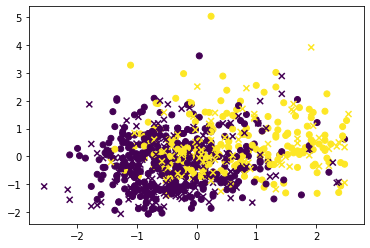

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x')

plt.show()

### K-NN

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

y_pred_2 = knn_classifier.predict(X_train)
acc_2 = accuracy_score(y_train, y_pred_2)*100


y_pred = knn_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100

print(f"KNN model train accuracy: {acc_2:.2f}%")
print(f"KNN model test accuracy: {acc:.2f}%")
print('Test labels:', np.unique(y_test, return_counts=True))
print('Pred labels:', np.unique(y_pred, return_counts=True))

KNN model train accuracy: 79.14%
KNN model test accuracy: 76.62%
Test labels: (array([0, 1]), array([150,  81], dtype=int64))
Pred labels: (array([0, 1]), array([168,  63], dtype=int64))


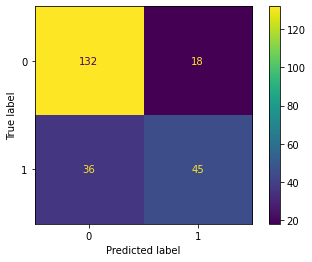

tn, fp, fn, tp [132  18  36  45]
0.6250000000000001
TP, TN, FP, FN (45, 132, 18, 36)


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# tn, fp, fn, tp
print('tn, fp, fn, tp', confusion_matrix.ravel())


# functions that are wrtitten by me
def conff_matrrix(actual_labels, predicted_labels):
    TP = 0
    TN = 0
    FP = 0
    FN = 0 
    for i, j in zip(actual_labels, predicted_labels):
        if i == 1 and j == 1:
            TP += 1
        elif i == 0 and j == 0:
            TN += 1
        elif i==1 and j == 0:
            FN += 1
        elif i ==0 and j == 1:
            FP += 1
    return TP, TN, FP, FN

def count_recall(actual_labels, predicted_labels):
    TP, TN, FP, FN = conff_matrrix(actual_labels, predicted_labels)
    recall = TP / (TP+FN) if (TP+FN) > 0 else 0
    return recall

def count_precision(actual_labels, predicted_labels):
    TP, TN, FP, FN = conff_matrrix(actual_labels, predicted_labels)
    precision = TP / (TP+FP) if (TP+FP) > 0 else 0
    return precision

def count_f1_score(actual_labels, predicted_labels):
    precision = count_precision(actual_labels, predicted_labels)
    recall = count_recall(actual_labels, predicted_labels)
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

f1_score = count_f1_score(y_test, y_pred)
print(f1_score)
print("TP, TN, FP, FN", conff_matrrix(y_test, y_pred))

### Decision Tree

Train Accuracy is: 81.19%
Test Accuracy is: 77.49%


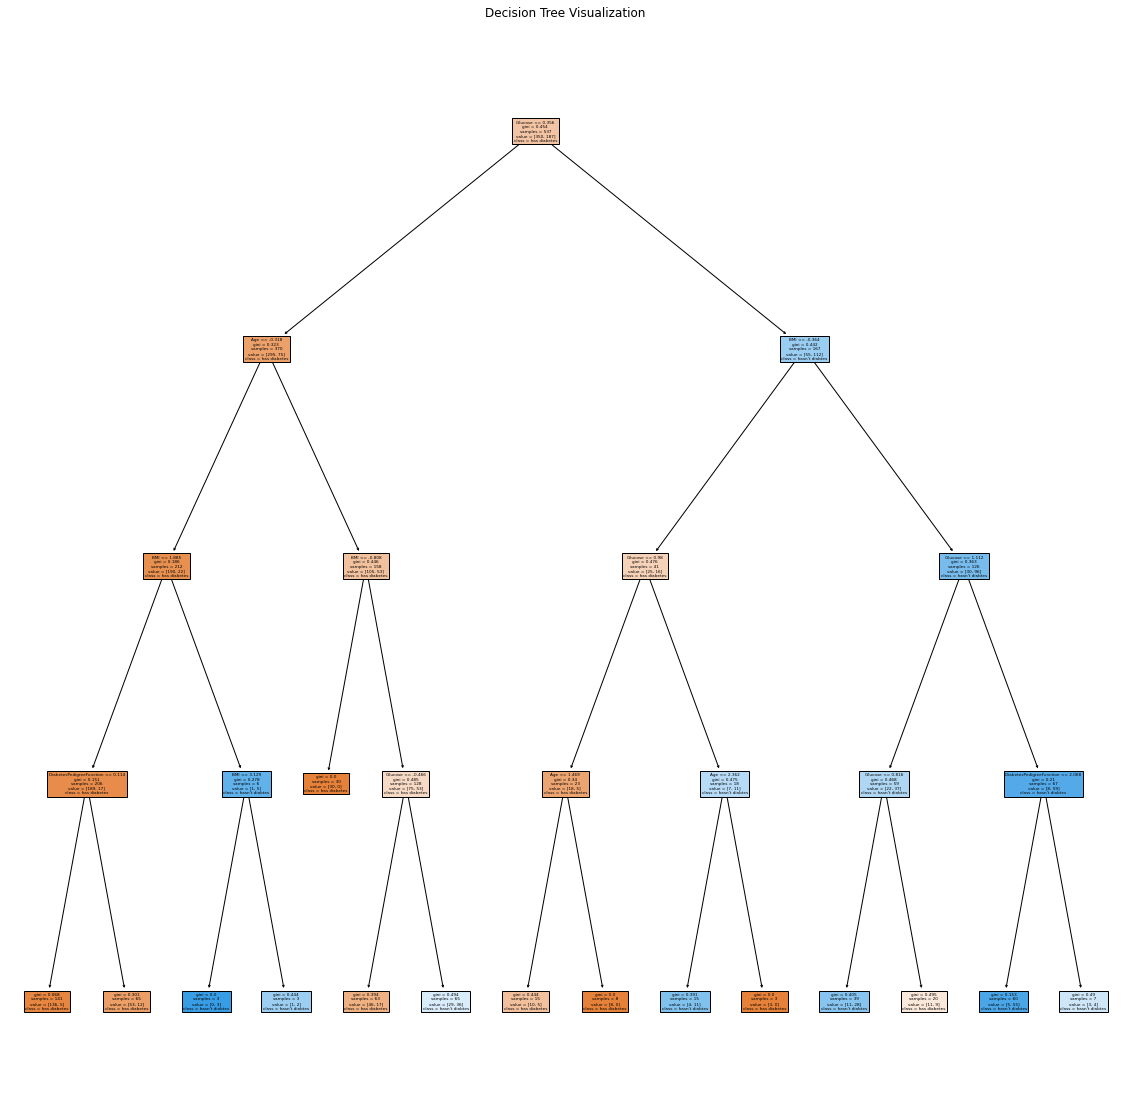

In [23]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=3)
dt_classifier.fit(X_train, y_train)

y_pred_2 = dt_classifier.predict(X_train)
acc_dt_2 = accuracy_score(y_train, y_pred_2)*100

y_pred = dt_classifier.predict(X_test)
acc_dt = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f"Train Accuracy is: {acc_dt_2:.2f}%")
print(f"Test Accuracy is: {acc_dt:.2f}%")

plt.figure(figsize=(20, 20))
plot_tree(dt_classifier, feature_names=column_names,
          class_names=['has diabetes', "hasn't diabtes"],
          filled=True)
plt.title('Decision Tree Visualization')
plt.show()

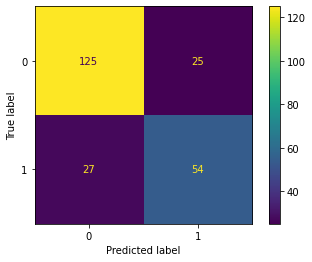

tn, fp, fn, tp [125  25  27  54]
0.675
TP, TN, FP, FN (54, 125, 25, 27)


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# tn, fp, fn, tp
print('tn, fp, fn, tp', confusion_matrix.ravel())

f1_score = count_f1_score(y_test, y_pred)
print(f1_score)
print("TP, TN, FP, FN", conff_matrrix(y_test, y_pred))

## Փուլ 5. Մոդելի ընտրություն. Cross validation

### Cross validation for KNN

K-nn-ի համար իրականացնելով cross_validation, տեսնում ենք, որ ամենաբարձր արժեքը մոդելը ցուցաբերում է 20seed-ի դեպքում և երբ k-ն հավասար է 21-ի

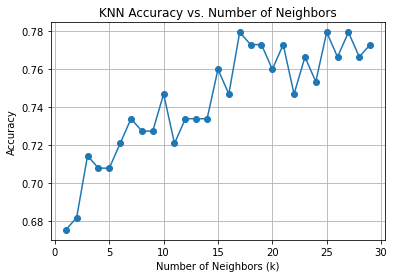

In [25]:
ks = list(range(1, 30))
accs = []

# Loop through different values of k
for k in ks:
    X_train, X_test, y_train, y_test = train_test_split(norm, labels, test_size=0.2, random_state=42, stratify=labels)
    
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)

# Plot the results
plt.plot(ks, accs, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid()
plt.show()


In [26]:
X_train, X_test, y_train, y_test = train_test_split(norm, labels, test_size=0.2, random_state=42, stratify=labels)
knn_classifier = KNeighborsClassifier(n_neighbors=17)
knn_classifier.fit(X_train, y_train)

y_pred_1 = knn_classifier.predict(X_train)
acc_1 = accuracy_score(y_train, y_pred_1) * 100
print(f"KNN model train accuracy: {acc_1:.2f}%")

y_pred = knn_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"KNN model test accuracy: {acc:.2f}%")

KNN model train accuracy: 81.43%
KNN model test accuracy: 77.92%


### Cross validation for decison tree

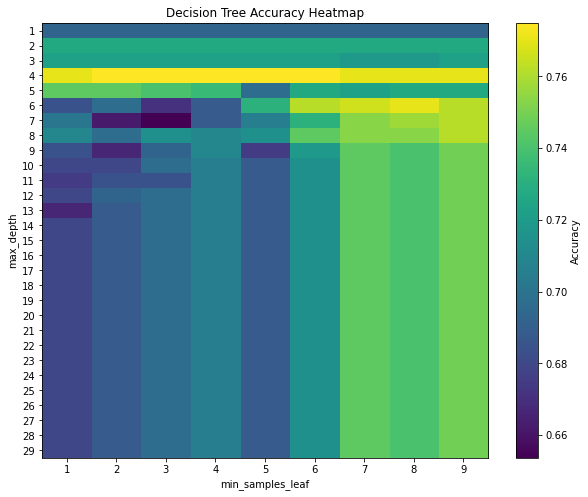

In [27]:
depths = list(range(1, 30))  # Tree depths to test
min_leaf_values = list(range(1, 10))  # Minimum samples per leaf to test
results = np.zeros((len(depths), len(min_leaf_values)))  # Store accuracies

# Loop through depths and min_samples_leaf
for i, depth in enumerate(depths):
    for j, min_leaf in enumerate(min_leaf_values):
        # Split the data with the fixed seed
        X_train, X_test, y_train, y_test = train_test_split(
            norm, labels, test_size=0.3, random_state=42, stratify=labels
        )

        tree_classifier = DecisionTreeClassifier(
            max_depth=depth, min_samples_leaf=min_leaf, random_state=42
        )
        tree_classifier.fit(X_train, y_train)

        # Test the model
        y_pred = tree_classifier.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # Store accuracy
        results[i, j] = acc

# Visualize the results with a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(results, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar(label='Accuracy')
plt.xticks(ticks=np.arange(len(min_leaf_values)), labels=min_leaf_values)
plt.yticks(ticks=np.arange(len(depths)), labels=depths)
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.title('Decision Tree Accuracy Heatmap')
plt.show()


Decision Tree train accuracy: 80.63%
Decision Tree test accuracy: 77.49%


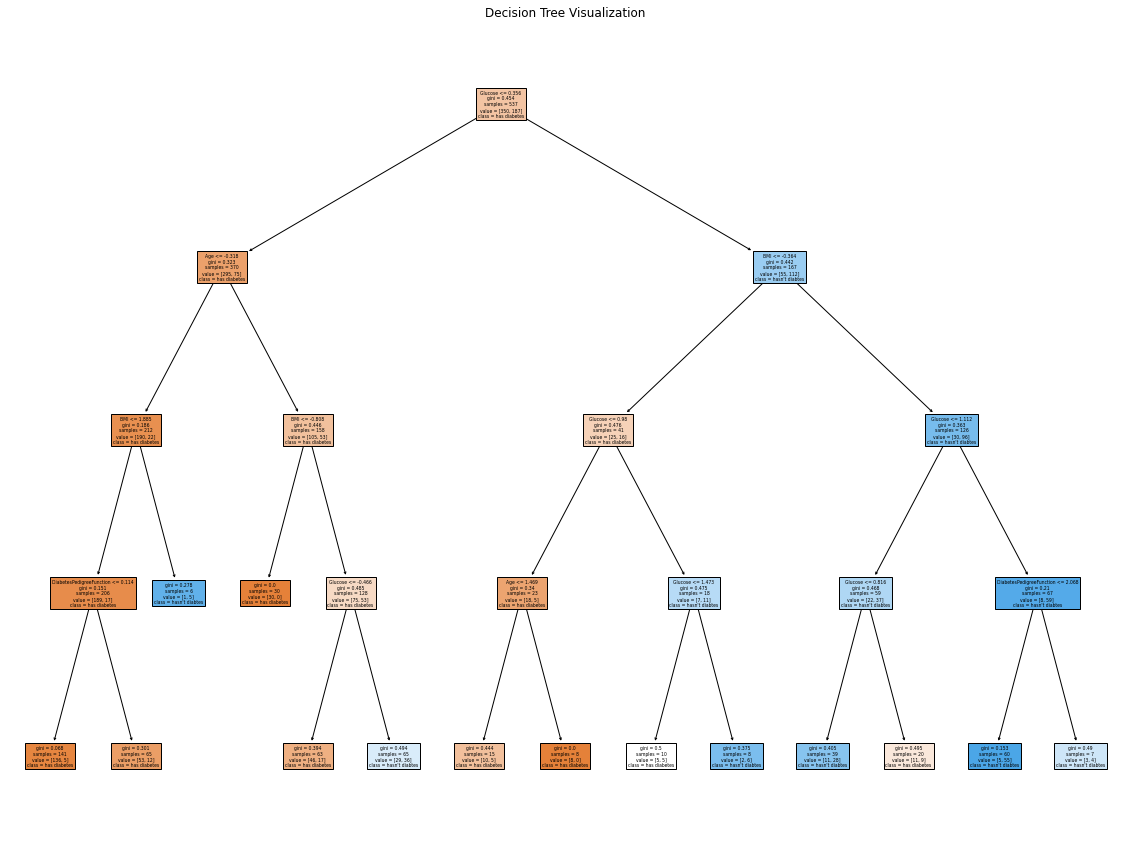

In [28]:
X_train, X_test, y_train, y_test = train_test_split(norm, labels, test_size=0.3, random_state=42, stratify=labels)
    
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=6)
dt_classifier.fit(X_train, y_train)

y_pred_1 = dt_classifier.predict(X_train)
acc_1 = accuracy_score(y_train, y_pred_1) * 100
print(f"Decision Tree train accuracy: {acc_1:.2f}%")

y_pred = dt_classifier.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
print(f"Decision Tree test accuracy: {acc:.2f}%")

plt.figure(figsize=(20, 15))
plot_tree(dt_classifier, feature_names=column_names,
          class_names=['has diabetes', "hasn't diabtes"],
          filled=True)
plt.title('Decision Tree Visualization')
plt.show()

**Մոդելների համեմատում և Լավագույնի ընտրություն** \
Աշխատելով երկու մոդելների՝ KNN և Decision Tree հետ և հաշվելով դրանց ճշգրտությունները, ավելի նպատակահարմար է ընտրել <b><u>Decision Tree</u></b> մոդելը, քանի որ training-ի և testing-ի ճշգրտությունների միջև տարբերությունը համեմատաբար ավելի փոքր է քան <u>KNN</u>-ի դեպքում։

### Փուլ 6․ Աշխատանք նոր դասակարգչի՝ SVM-ի, հետ

In [40]:
X_train, X_test, y_train, y_test = train_test_split(norm, labels, test_size=0.3, random_state=42, stratify=labels)
svm_model = SVC(kernel='rbf' , C=1)
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)

print(f"accuracy train: {acc_train*100:.2f}%")
print(f"accuracy test: {acc_test*100:.2f}%")

accuracy train: 81.56%
accuracy test: 77.49%


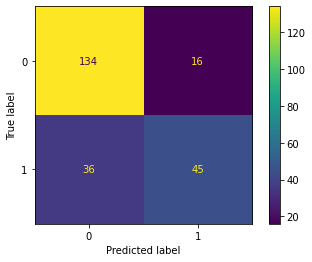

tn, fp, fn, tp [134  16  36  45]
0.6338028169014086
TP, TN, FP, FN (45, 134, 16, 36)


In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# tn, fp, fn, tp
print('tn, fp, fn, tp', confusion_matrix.ravel())

f1_score = count_f1_score(y_test, y_pred_test)
print(f1_score)
print("TP, TN, FP, FN", conff_matrrix(y_test, y_pred_test))

### Cross Validation for SVM 

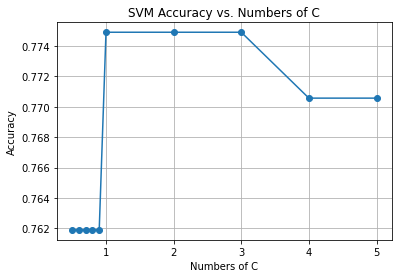

In [49]:
c_s = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5]
accs_svm = []

for c in c_s:
    X_train, X_test, y_train, y_test = train_test_split(norm, labels, test_size=0.3, random_state=42, stratify=labels)
    
    svm_model = SVC(kernel='rbf' , C=c)
    svm_model.fit(X_train, y_train)
    y_pred_test = svm_model.predict(X_test)
    acc = accuracy_score(y_pred_test, y_test)
    accs_svm.append(acc)
    
plt.plot(c_s, accs_svm, marker='o')
plt.xlabel('Numbers of C')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Numbers of C')
plt.grid()
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(norm, labels, test_size=0.3, random_state=42, stratify=labels)
svm_model = SVC(kernel='rbf' , C=1)
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)

print(f"SVM train accuracy: {acc_train*100:.2f}%")
print(f"SVM test accuracy: {acc_test*100:.2f}%")

SVM train accuracy: 81.56%
SVM test accuracy: 77.49%


<b>SVM</b>-ի հիպերպարամետրի` C-ի համար, լավագույն արժեքը հանդիսանում է 1-ը, քանի որ ավելի բարձր արժեքի դեպքում, մոդելը լավ արրդյունք է ցույց տալիս միայն training-ի վրա, այնինչ testing-ի վրա բավականին ցածր արժեք։ Այսինքն մեր մոդելը overfit է լինում։ C-ի ցածր արժեքների դեպքում training-ի և testing-ի ճշգրտությունների արժեքները մոտ են իրար, սակայն բավականին ցածր են 100-ից։

# Վերջ😊